<a href="https://colab.research.google.com/github/PengZhao-GitHub/tfw/blob/master/Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

60000
10000
label 5
data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

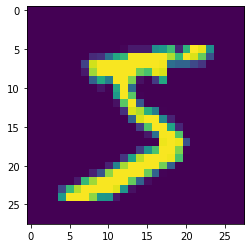

In [18]:
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
# YOUR CODE SHOULD END HERE

import tensorflow as tf
mnist = tf.keras.datasets.mnist

# Step 1: prepare data
#************************************************************
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
print(len(x_train))
print(len(x_test))

import matplotlib.pyplot as plt
print('label', y_train[0])
print('data', x_train[0])
plt.imshow(x_train[0])

x_train = x_train / 255
x_test = x_test /255

# YOUR CODE SHOULD END HERE

# Step 2: create model 
#************************************************************
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Step 3: Train the model with the prepared data
#************************************************************
# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
model.summary()
# YOUR CODE SHOULD END HERE





Test label 2


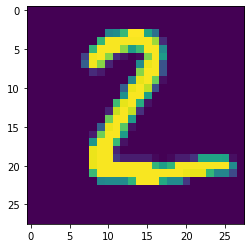

In [27]:
# Step 4: Predict
#************************************************************
print('Test label', y_test[1])
#print('Testdata', x_test[1])
plt.imshow(x_test[1])

In [30]:
import numpy as np

answer = model.predict(np.reshape(x_test[1],(1,784)))

arr = answer[0]
print('answer', arr)
print('Predicted label', np.where(arr == np.amax(arr)))


answer [3.74569442e-09 8.35714163e-05 9.99915719e-01 7.13229383e-07
 2.59455271e-16 3.69631797e-10 1.72423985e-11 2.30680600e-13
 1.31038655e-08 5.08133002e-09]
Predicted label (array([2]),)
